# Решающие деревья. Практика

В этом задании будем решать задачу классификации клиентов телекома: для каждого клиента необходимо определить, перестанет он пользоваться услугами оператора (оттоковый клиент) в ближайшее время или нет.

В ноутбуке будем использовать несколько моделей, в том числе SVM, поэтому установим библиотеку для быстрого обучения SVM.

## Импорт библиотек и загрузка данных

In [ ]:
# убедимся, что версия python < 3.10
!python --version

Python 3.9.16


In [9]:
%%capture
!python -m pip install --upgrade pip
!pip install --upgrade scikit-learn-intelex

In [12]:
from sklearnex import patch_sklearn
patch_sklearn()

In [1]:
import sys
import os
import site
import pandas as pd
import numpy as np

sys.path.append(os.path.join(os.path.dirname(site.getsitepackages()[0]), "site-packages"))

In [2]:
# зафиксируем константы
RANDOM_STATE = 42

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/evgpat/edu_stepik_practical_ml/main/datasets/telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Практика

In [4]:
np.random.seed(RANDOM_STATE)

Сделайте первичную обработку данных:

1) Выбросите колонку State

2) Колонки International plan и Voice mail plan закодируйте следующим образом: "Yes" замените на 1, а "No" на 0.

3) Переведите целевую переменную (Churn) в числа: True в 1, а False в 0.

In [13]:
df=df.drop('State',axis=1)
df[['International plan', 'Voice mail plan']] = df[['International plan', 'Voice mail plan']].replace({'Yes': 1, 'No': 0})
df['Churn']=df['Churn'].astype(int)

### Вопрос

Чему равна сумма значений в закодированном столбце International plan?

In [14]:
df['International plan'].sum()

323

Выведите на экран первые строки измененной таблицы, чтобы проверить, что все преобразования сработали.

In [15]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Создайте матрицу объект-признак X и вектор с целевой переменной (Churn) y.

In [16]:
X=df.drop('Churn',axis=1)
y=df['Churn']

### Вопрос

Проверьте баланс классов. Является ли выборка сбалансированной?

In [17]:
y.value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

По кросс-валидации с тремя фолдами и метрикой ROC-AUC (scoring='roc_auc') обучите:

1) Логистическую регрессию

2) Метод опорных векторов (с kernel='linear')

Выведите на экран среднее качество моделей на кросс-валидации.

При объявлении SVC не забудьте указать в гиперпараметрах probability = True (так как метод изначально не предсказывает вероятности классов, а они нам нужны для вычисления ROC-AUC).

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Применяем масштабирование к признакам
X=pd.DataFrame(X_scaled,columns=X.columns)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

roc_auc_lr = cross_val_score(LogisticRegression(), X, y, cv=3, scoring='roc_auc').mean()
roc_auc_svc = cross_val_score(SVC(kernel='linear', probability=True), X, y, cv=3, scoring='roc_auc').mean()

In [28]:
roc_auc_lr,roc_auc_svc

(0.8141745668519125, 0.6982020268061458)

Теперь обучите решающее дерево с параметрами по умолчанию по кросс-валидации с тремя фолдами и той же метрикой.

ВАЖНО! У решающего дерева для воспроизводимости результатов фиксируйте random_state = RANDOM_STATE

In [29]:
from sklearn.tree import DecisionTreeClassifier

roc_auc_lr = cross_val_score(DecisionTreeClassifier(random_state = RANDOM_STATE), X, y, cv=3, scoring='roc_auc').mean()
roc_auc_lr

0.8356173041298899

### Вопрос

Какой из трех алгоритмов показал наилучшее качество на кросс-валидации?

Ваша цель - максимально улучшить модели. Для этого:

1) у линейных моделей подберите гиперпараметр С (переберите 20 значений C в диапазоне от 0.1 до 10 с равным шагом).

2) у решающего дерева подберите max_depth (переберите глубину от 1 до 10 с шагом 1) и criterion - "gini" или "entropy".

Для подбора параметров используйте GridSearchCV с тремя фолдами и метрикой roc-auc или обычные циклы.

Подбор параметров осуществляется только по тренировочным данным!

При подборе гиперпараметров по кросс-валидации для дальнейшей корректной оценки качества модели нужна отдельная выборка. Давайте сразу действовать правильно:

1) сначала разбиваем (как и раньше) данные на тренировочную и тестовую части
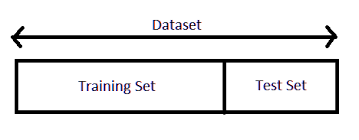

2) затем по тренировочной части при помощи GridSearchCV подбираем оптимальные значения гиперпараметров

3) наконец, делаем предсказание модели с оптимальными гиперпараметрами на тестовых данных и уже по ним оцениваем итоговую метрику.

Сложно, зато правильно!

Первую модель обучим для примера. Дальше вы сами.

In [30]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

In [31]:
from sklearn.model_selection import GridSearchCV

params = {'C' : np.linspace(0.1, 10.01, 20)}

gs = GridSearchCV(LogisticRegression(), params, cv=3, scoring='roc_auc')

gs.fit(Xtrain, ytrain)

gs.best_score_, gs.best_estimator_

(0.8002127034542678, LogisticRegression(C=2.707894736842105))

In [32]:
from sklearn.metrics import roc_auc_score

lr = gs.best_estimator_

pred_lr = lr.predict_proba(Xtest)[:,1]
print(roc_auc_score(ytest, pred_lr))

0.8283734934843452


### Метод опорных векторов

In [33]:
params = {'C' : np.linspace(1, 10,10)}

gs = GridSearchCV(SVC(kernel='linear', probability=True), params, cv=3, scoring='roc_auc')

gs.fit(Xtrain, ytrain)

gs.best_score_, gs.best_estimator_

(0.7656690783806371, SVC(C=0.1, kernel='linear', probability=True))

In [34]:
svc = gs.best_estimator_

pred_svc = lr.predict_proba(Xtest)[:,1]
print(roc_auc_score(ytest, pred_svc))

0.7434945451281508


### Решающие деревья 

In [40]:
params = {
    'max_depth': np.arange(1, 10,1),  # 20 значений от 0.1 до 10.01
    'criterion': ["gini", "entropy"]  # Два критерия для оценки качества разделения
}
gs = GridSearchCV(DecisionTreeClassifier(random_state = RANDOM_STATE), params, cv=3, scoring='roc_auc')

gs.fit(Xtrain, ytrain)

gs.best_score_, gs.best_estimator_

(0.8644263148363854, DecisionTreeClassifier(max_depth=6, random_state=42))

In [48]:
tree = gs.best_estimator_

pred_tree = tree.predict_proba(Xtest)[:,1]
print(roc_auc_score(ytest, pred_tree))

0.8555540142471298


### Вопрос

Чему равно качество решающего дерева с подобранными гиперпараметрами, посчитанное на тестовой выборке?

Ответ округлите до сотых.

Какая модель справилась с решением задачи лучше всего по метрике roc_auc?

Нарисуйте roc-кривую для наилучшей модели.

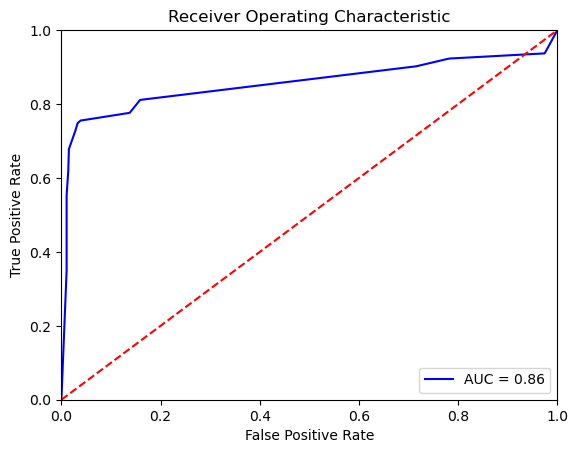

In [51]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(ytest, pred_tree )
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

Сравните между собой две лучшие модели.

### Вопрос

Насколько сильно отличается качество предсказания на тестовых данных?
(вычислите разность значений roc-auc)

Постройте гистограммы важности признаков (для линейных моделей берите модуль значений весов) для каждой из этих моделей. Сравните между собой списки из трех самых важных признаков. Совпадают ли они?

In [58]:
model_LR=LogisticRegression(C=2.707894736842105)
model_SVC=SVC(C=0.1, kernel='linear')
model_tree=DecisionTreeClassifier(max_depth=6, random_state=42)

model_LR.fit(Xtrain,ytrain)
model_SVC.fit(Xtrain,ytrain)
model_tree.fit(Xtrain,ytrain)

DecisionTreeClassifier(max_depth=6, random_state=42)

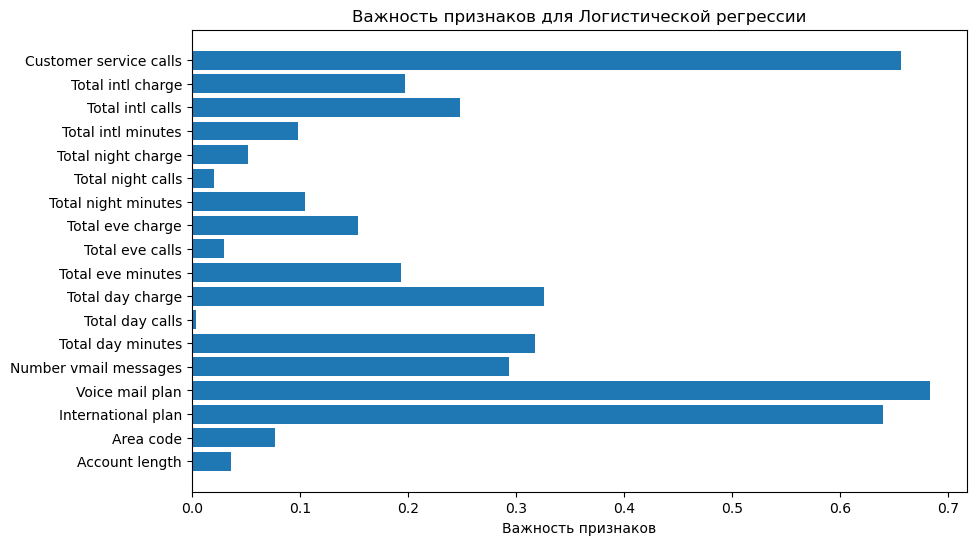

In [66]:
weights_LR = model_LR.coef_[0]  # Учитываем только один класс для бинарной классификации
importance_LR = abs(weights_LR)  # Модуль весов

plt.figure(figsize=(10, 6))
plt.barh(range(len(importance_LR)), importance_LR, align='center')
plt.yticks(range(len(importance_LR)), Xtrain.columns)  # Названия признаков
plt.xlabel('Важность признаков')
plt.title('Важность признаков для Логистической регрессии')
plt.show()

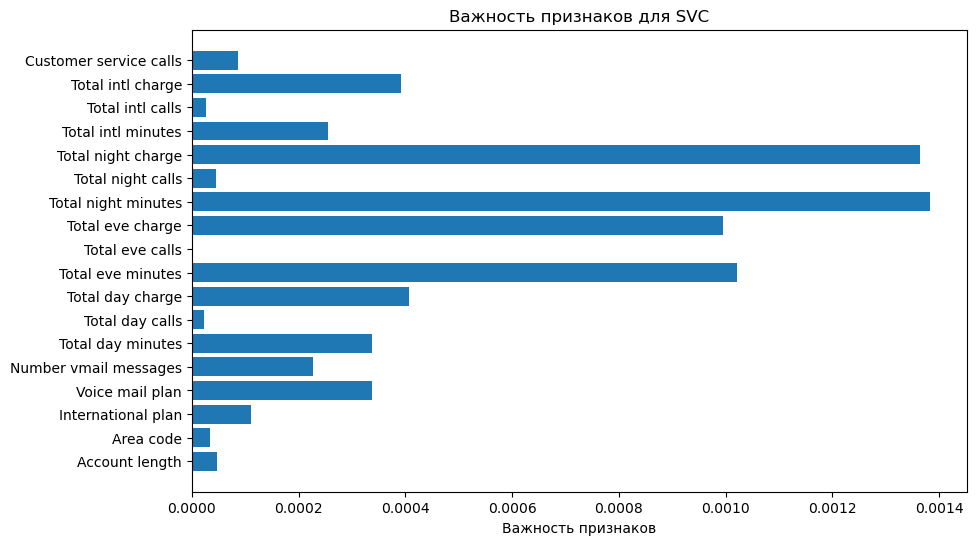

In [83]:

weights_SVC = model_SVC.coef_[0]  
importance_SVC = abs(weights_SVC)  

plt.figure(figsize=(10, 6))
plt.barh(range(len(importance_SVC)), importance_SVC, align='center')
plt.yticks(range(len(importance_SVC)), Xtrain.columns)  # Названия признаков
plt.xlabel('Важность признаков')
plt.title('Важность признаков для SVC')
plt.show()

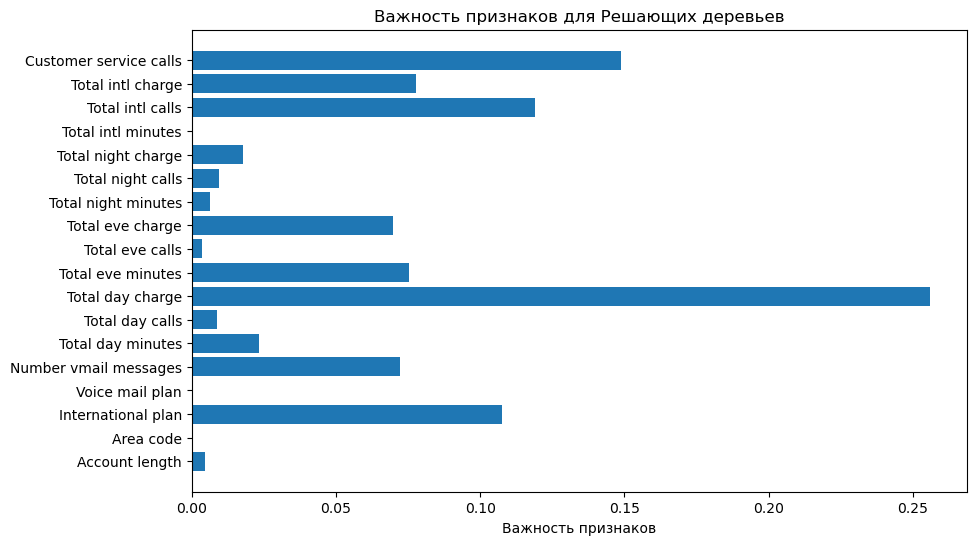

In [86]:
importance_tree = model_tree.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(range(len(importance_tree)), importance_tree, align='center')
plt.yticks(range(len(importance_tree)), Xtrain.columns)  # Названия признаков
plt.xlabel('Важность признаков')
plt.title('Важность признаков для Решающих деревьев')
plt.show()

### Вопрос

Какой признак наиболее важен для решающего дерева?

In [ ]:
# your code here

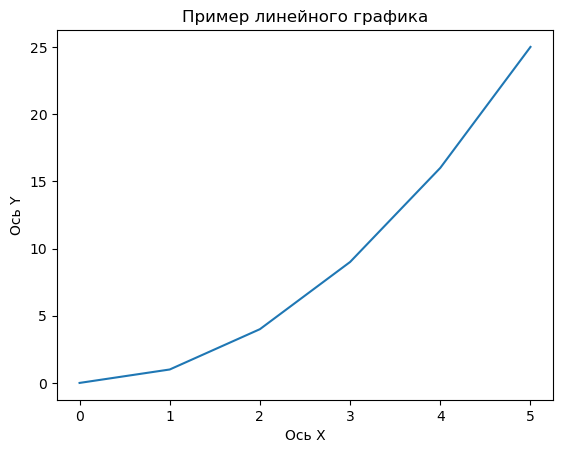

In [87]:
import matplotlib.pyplot as plt

# Пример данных
x = [0, 1, 2, 3, 4, 5]
y = [0, 1, 4, 9, 16, 25]

# Построение линейного графика
plt.plot(x, y)

# Добавление подписей
plt.title("Пример линейного графика")
plt.xlabel("Ось X")
plt.ylabel("Ось Y")

# Показать график
plt.show()

Сделайте выводы (для себя)

1) Являются ли данные сбалансированными? Что это означает?

2) Какая модель после подбора гиперпараметров лучше всего решает задачу с точки зрения метрики roc-auc?

3) Одинаковые ли признаки важны для работы двух наилучших моделей? Как вы думаете, почему так?